# 提升树算法（Adaboost）
多颗基础决策树的加权运算，最具代表性的提升树为Adaboost算法

支持分类问题和预测问题:
    分类问题：AdaboostClassifier
    预测问题：AdaboostRegressor

## 分类问题

In [19]:
# 导入第三方包
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# 读入数据
default = pd.read_excel(r'default of credit card clients.xls')
default.info()
default.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
y            30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


因变量y表示用户在下个月的信用卡还款中是否存在违约的情况（1违约，0不违约）。首先绘制饼图，查看因变量中各类别的比例差异。

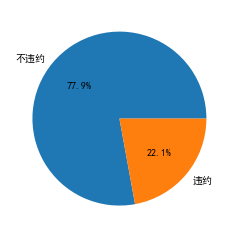

In [21]:
# 数据集中是否违约的客户比例
# 为确保绘制的饼图为圆形，需执行如下代码
plt.axes(aspect = 'equal')
# 中文乱码和坐标轴负号的处理
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 统计客户是否违约的频数
counts = default.y.value_counts()
# 绘制饼图
plt.pie(x = counts, # 绘图数据
        labels=pd.Series(counts.index).map({0:'不违约',1:'违约'}), # 添加文字标签
        autopct='%.1f%%' # 设置百分比的格式，这里保留一位小数
       )
# 显示图形
plt.show()

总体来说，两个类别的比例不算失衡（一般而言，如果两个类别比例为9:1，则认为失衡，如果比例为99:1，则认为严重失衡）。接下来构建AdaBoost模型。

In [22]:
# 将数据集拆分为训练集和测试集
# 导入第三方包
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

# 排除数据集中的ID变量和因变量，剩余的数据用作自变量X
X = default.drop(['ID','y'], axis = 1)
y = default.y
# 数据拆分
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,
                                                                 y,
                                                                 test_size = 0.25,
                                                                 random_state = 1234)

# 构建AdaBoost算法的类
AdaBoost1 = ensemble.AdaBoostClassifier()
# 算法在训练数据集上的拟合
AdaBoost1.fit(X_train,y_train)
# 算法在测试数据集上的预测
pred1 = AdaBoost1.predict(X_test)

# 返回模型的预测效果
print('模型的准确率为：\n',metrics.accuracy_score(y_test, pred1))
print('模型的评估报告：\n',metrics.classification_report(y_test, pred1))

模型的准确率为：
 0.8125333333333333
模型的评估报告：
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5800
           1       0.68      0.32      0.44      1700

    accuracy                           0.81      7500
   macro avg       0.75      0.64      0.66      7500
weighted avg       0.80      0.81      0.79      7500



In [58]:
pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

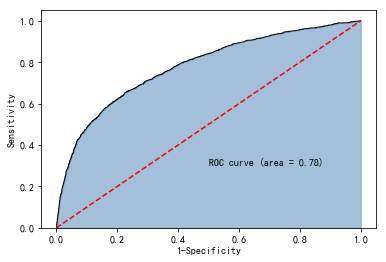

In [7]:
# 计算客户违约的概率值，用于生成ROC曲线的数据
y_score = AdaBoost1.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

AUC=0.78，接近0.8，可知该算法在该数据集表现并不是特别突出，可以通过参数调整改善。在参数调优之前，基于以上模型寻找影响客户是否违约的重要因素，做一次特征筛选。

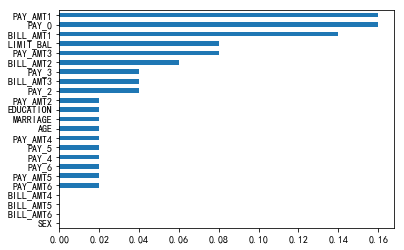

In [8]:
# 自变量的重要性排序
importance = pd.Series(AdaBoost1.feature_importances_, index = X.columns)
importance.sort_values().plot(kind = 'barh')
plt.show()

In [16]:
# 取出重要性比较高的自变量建模
predictors = list(importance[importance>0.02].index)  # 这里只是筛选特征，并没有对特征进行排序
predictors

# 通过网格搜索法选择基础模型所对应的合理参数组合
# 导入第三方包
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

max_depth = [3,4,5,6]
params1 = {'base_estimator__max_depth':max_depth}
base_model = GridSearchCV(estimator = ensemble.AdaBoostClassifier(base_estimator = DecisionTreeClassifier()),
                          param_grid= params1, 
                          scoring = 'roc_auc', 
                          cv = 5, 
                          n_jobs = 4, 
                          verbose = 1)
base_model.fit(X_train[predictors],y_train)
# 返回参数的最佳组合和对应AUC值
base_model.best_params_, base_model.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  1.1min finished


({'base_estimator__max_depth': 3}, 0.7443552336164352)

基于这个结果对AdaBoost进行参数调优

In [20]:
# 通过网格搜索法选择提升树的合理参数组合
# 导入第三方包

n_estimators = [100,200,300]  # 基础分类器的数量
learning_rate = [0.01,0.05,0.1,0.2]
params2 = {'n_estimators':n_estimators,'learning_rate':learning_rate}
adaboost = GridSearchCV(estimator = ensemble.AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3)),
                        param_grid= params2,
                        scoring = 'roc_auc', 
                        cv = 5, 
                        n_jobs = 4, 
                        verbose = 1)
adaboost.fit(X_train[predictors] ,y_train)
# 返回参数的最佳组合和对应AUC值
adaboost.best_params_, adaboost.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  9.3min finished


({'learning_rate': 0.01, 'n_estimators': 300}, 0.7686651247755136)

In [26]:
adaboost

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

上述只探索了CART决策树的深度，提升树中包含的基础模型个数和学习率，其他可以自己另行探索。

基于以上的调参结果重新构造AdaBoost模型，检验在测试集上的预测结果.

In [21]:
# 使用最佳的参数组合构建AdaBoost模型
AdaBoost2 = ensemble.AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3),
                                        n_estimators = 300, 
                                        learning_rate = 0.01)
# 算法在训练数据集上的拟合
AdaBoost2.fit(X_train[predictors],y_train)
# 算法在测试数据集上的预测
pred2 = AdaBoost2.predict(X_test[predictors])

# 返回模型的预测效果
print('模型的准确率为：\n',metrics.accuracy_score(y_test, pred2))
print('模型的评估报告：\n',metrics.classification_report(y_test, pred2))

模型的准确率为：
 0.8158666666666666
模型的评估报告：
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5800
           1       0.69      0.34      0.45      1700

   micro avg       0.82      0.82      0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500



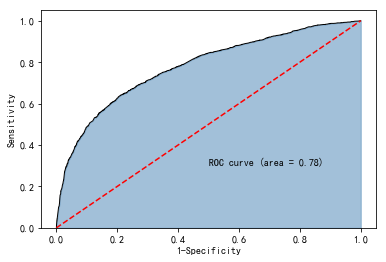

In [22]:
# 计算正例的预测概率，用于生成ROC曲线的数据
y_score = AdaBoost2.predict_proba(X_test[predictors])[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

模型在测试集上的准确率为81.6%，相比于默认参数仅仅提高了0.35%

# 梯度提升树
## 分类问题
数据集仍然是上面的客户信用卡违约数据，可以对比GBDT算法和AdaBoost算法在该数据集上的效果差异。

In [27]:
# 运用网格搜索法选择梯度提升树的合理参数组合
learning_rate = [0.01,0.05,0.1,0.2]
n_estimators = [100,300,500]
max_depth = [3,4,5,6]
params = {'learning_rate':learning_rate,'n_estimators':n_estimators,'max_depth':max_depth}
gbdt_grid = GridSearchCV(estimator = ensemble.GradientBoostingClassifier(),
                         param_grid= params,
                         scoring = 'roc_auc', 
                         cv = 5, 
                         n_jobs = 4, 
                         verbose = 1)
gbdt_grid.fit(X_train[predictors],y_train)
# 返回参数的最佳组合和对应AUC值
gbdt_grid.best_params_, gbdt_grid.best_score_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 22.4min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed: 28.5min finished


({'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}, 0.7739117683479)

In [31]:
gbdt_grid

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [100, 300, 500], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [28]:
# 基于最佳参数组合的GBDT模型，对测试数据集进行预测
pred = gbdt_grid.predict(X_test[predictors])
# 返回模型的预测效果
print('模型的准确率为：\n',metrics.accuracy_score(y_test, pred))
print('模型的评估报告：\n',metrics.classification_report(y_test, pred))

模型的准确率为：
 0.8144
模型的评估报告：
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      5800
           1       0.68      0.34      0.46      1700

   micro avg       0.81      0.81      0.81      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.81      0.79      7500



GBDT模型在测试数据集上的预测效果与AdaBoost算法基本一致，进而可以说明GBDT算法采用一阶导函数的值近似残差是合理的，并且这种功能也提升了AdaBoost算法求解目标函数的便捷性。

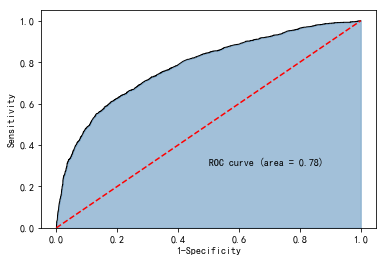

In [29]:
# 计算违约客户的概率值，用于生成ROC曲线的数据
y_score = gbdt_grid.predict_proba(X_test[predictors])[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

# 非平衡数据的处理
    实际应用中，如：欺诈类观测、客户流失问题、营销活动响应问题，数据存在不平衡现象，那么预测得出的结论往往也是有偏的，即分类结果会偏向于较多观测的一类。简单的方法是构造1:1的数据，将多的一部分进行欠采样，少的一类进行bootstrap抽样（过采样），这样会有问题，前者会丢失信息，后者有放回的抽样形成简单复制，容易过拟合。
    
    为了解决数据的非平衡问题，Chawla提出了SMOTE算法，即合成少数过采样技术。
    
    SMOTE算法的模拟过程采用了KNN技术，步骤如下：
    1. 采用KNN算法，计算出每个少数类样本的K个近邻
    2. 从K个近邻中随机挑选N个样本进行随机线性插值
    3. 构造新的少数类样本
    4. 将新样本与原数据合成，产生新的训练集

# 极致梯度决策树(XGBoost)
## 分类问题
    数据集：信用卡欺诈
    因变量Class表示用户在交易中是否发生欺诈行为（1表示欺诈交易，0表示正常交易）。
    由于数据中设计敏感信息，对其做了PCA处理，一共包含28个主成分，仅time和Amount没有做主成分处理，分别表示交易时间间隔和交易金额。
    首先探索因变量Class中各类别比例差异。

In [5]:
# 读入数据
creditcard = pd.read_csv(r'creditcard.csv')
creditcard.info()
creditcard.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


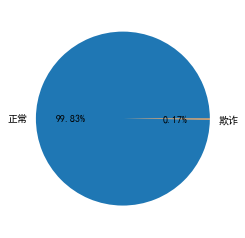

In [26]:
# 为确保绘制的饼图为圆形，需执行如下代码
plt.axes(aspect = 'equal')
# 中文乱码和坐标轴负号的处理
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 统计交易是否为欺诈的频数
counts = creditcard.Class.value_counts()
# 绘制饼图
plt.pie(x = counts, # 绘图数据
        labels=pd.Series(counts.index).map({0:'正常',1:'欺诈'}), # 添加文字标签
        autopct='%.2f%%' # 设置百分比的格式，这里保留一位小数
       )
# 显示图形
plt.show()

类别比例存在严重不平衡，需要用SMOTE算法转换为相对平衡的数据。

In [44]:
# 将数据拆分为训练集和测试集
# 删除自变量中的Time变量
X = creditcard.drop(['Time','Class'], axis = 1)
y = creditcard.Class
# 数据拆分
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,
                                                                 y,
                                                                 test_size = 0.3,
                                                                 random_state = 1234)

In [46]:
# 导入第三方包
from imblearn.over_sampling import SMOTE

# 运用SMOTE算法实现训练数据集的平衡
over_samples = SMOTE(random_state=1234) 
over_samples_X,over_samples_y = over_samples.fit_sample(X_train, y_train)
#over_samples_X, over_samples_y = over_samples.fit_sample(X_train.values,y_train.values.ravel())
# 重抽样前的类别比例
print(y_train.value_counts()/len( y_train))
# 重抽样后的类别比例
print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))

0    0.998239
1    0.001761
Name: Class, dtype: float64
1    0.5
0    0.5
Name: Class, dtype: float64


In [49]:
# 导入第三方包
import xgboost
import numpy as np
# 构建XGBoost分类器
xgboost1 = xgboost.XGBClassifier()
# 使用重抽样后的数据，对其建模
xgboost1.fit(over_samples_X.values,over_samples_y)  # 注意这里：要加.values
# 将模型运用到测试数据集中
resample_pred = xgboost1.predict(X_test.values)

# 返回模型的预测效果
print('模型的准确率为：\n',metrics.accuracy_score(y_test, resample_pred))
print('模型的评估报告：\n',metrics.classification_report(y_test, resample_pred))

模型的准确率为：
 0.9901454771016935
模型的评估报告：
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85302
           1       0.13      0.88      0.23       141

    accuracy                           0.99     85443
   macro avg       0.57      0.93      0.61     85443
weighted avg       1.00      0.99      0.99     85443



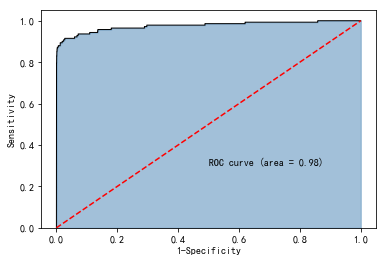

In [50]:
# 计算欺诈交易的概率值，用于生成ROC曲线的数据
y_score = xgboost1.predict_proba(np.array(X_test))[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()

In [53]:
# 构建XGBoost分类器
xgboost2 = xgboost.XGBClassifier()
# 使用非平衡的训练数据集拟合模型
xgboost2.fit(X_train,y_train)
# 基于拟合的模型对测试数据集进行预测
pred2 = xgboost2.predict(X_test)
# 混淆矩阵
pd.crosstab(pred2,y_test)

Class,0,1
row_0,,
0,85287,36
1,15,105


In [54]:
# 返回模型的预测效果
print('模型的准确率为：\n',metrics.accuracy_score(y_test, pred2))
print('模型的评估报告：\n',metrics.classification_report(y_test, pred2))

模型的准确率为：
 0.999403110845827
模型的评估报告：
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85302
           1       0.88      0.74      0.80       141

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
显然，用不平衡的数据直接建模，虽然准确率有99.9%，但正样本的覆盖率只有74%，不如平衡数据的88%

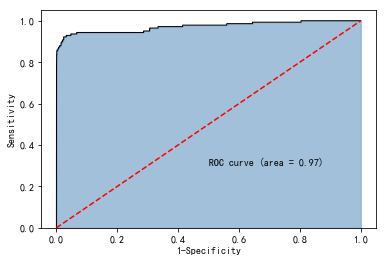

In [55]:
# 计算欺诈交易的概率值，用于生成ROC曲线的数据
y_score = xgboost2.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
# 计算AUC的值
roc_auc = metrics.auc(fpr,tpr)

# 绘制面积图
plt.stackplot(fpr, tpr, color='steelblue', alpha = 0.5, edgecolor = 'black')
# 添加边际线
plt.plot(fpr, tpr, color='black', lw = 1)
# 添加对角线
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
# 添加文本信息
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
# 添加x轴与y轴标签
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
# 显示图形
plt.show()